In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [25]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [26]:
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  201220752  09/16/2020 12:00:00 AM  09/16/2020 12:00:00 AM      1230    12   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2  77th Street         1259         2     745   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO  Adult Other   
1                           BATTERY - SIMPLE ASSAULT  ...     IC  Invest Cont   
2           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC  Invest Cont   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC  Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    624.0      NaN       NaN      NaN   
1    624.0      NaN       NaN      NaN   
2    745.0      NaN       NaN      NaN   
3    745.0    998.0       NaN      NaN   
4    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    700 E  73RD                         ST          NaN  33.9739 -118.2630  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [27]:
df.describe().T

count          mean           std       min           25%  \
DR_NO           317854.0  2.050625e+08  4.965168e+06  817.0000  2.009132e+08   
TIME OCC        317854.0  1.352763e+03  6.500014e+02    1.0000  9.200000e+02   
AREA            317854.0  1.079886e+01  6.039124e+00    1.0000  6.000000e+00   
Rpt Dist No     317854.0  1.126046e+03  6.040058e+02  101.0000  6.280000e+02   
Part 1-2        317854.0  1.412765e+00  4.923320e-01    1.0000  1.000000e+00   
Crm Cd          317854.0  5.089288e+02  2.103386e+02  110.0000  3.300000e+02   
Vict Age        317854.0  3.007335e+01  2.171658e+01   -1.0000  1.200000e+01   
Premis Cd       317849.0  2.944511e+02  2.129494e+02  101.0000  1.010000e+02   
Weapon Used Cd  116477.0  3.625238e+02  1.231582e+02  101.0000  3.080000e+02   
Crm Cd 1        317851.0  5.086576e+02  2.101257e+02  110.0000  3.300000e+02   
Crm Cd 2         25981.0  9.554274e+02  1.160663e+02  210.0000  9.980000e+02   
Crm Cd 3           880.0  9.823761e+02  5.363315e+01  626.0000  9.980000e+02   
Crm Cd 4            30.0  9.898667e+02  3.422515e+01  821.0000  9.980000e+02   
LAT             317854.0  3.382510e+01  2.893775e+00    0.0000  3.400780e+01   
LON             317854.0 -1.174956e+02  1.004482e+01 -118.6676 -1.184296e+02   

                         50%           75%           max  
DR_NO           2.018096e+08  2.108086e+08  2.199178e+08  
TIME OCC        1.430000e+03  1.900000e+03  2.359000e+03  
AREA            1.100000e+01  1.600000e+01  2.100000e+01  
Rpt Dist No     1.149000e+03  1.621000e+03  2.199000e+03  
Part 1-2        1.000000e+00  2.000000e+00  2.000000e+00  
Crm Cd          5.100000e+02  6.260000e+02  9.560000e+02  
Vict Age        3.100000e+01  4.500000e+01  1.200000e+02  
Premis Cd       2.030000e+02  5.010000e+02  9.710000e+02  
Weapon Used Cd  4.000000e+02  4.000000e+02  5.160000e+02  
Crm Cd 1        5.100000e+02  6.260000e+02  9.560000e+02  
Crm Cd 2        9.980000e+02  9.980000e+02  9.990000e+02  
Crm Cd 3        9.980000e+02  9.980000e+02  9.990000e+02  
Crm Cd 4        9.980000e+02  9.980000e+02  9.990000e+02  
LAT             3.405740e+01  3.416290e+01  3.433430e+01  
LON            -1.183213e+02 -1.182740e+02  0.000000e+00

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317854 entries, 0 to 317853
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           317854 non-null  int64  
 1   Date Rptd       317854 non-null  object 
 2   DATE OCC        317854 non-null  object 
 3   TIME OCC        317854 non-null  int64  
 4   AREA            317854 non-null  int64  
 5   AREA NAME       317854 non-null  object 
 6   Rpt Dist No     317854 non-null  int64  
 7   Part 1-2        317854 non-null  int64  
 8   Crm Cd          317854 non-null  int64  
 9   Crm Cd Desc     317854 non-null  object 
 10  Mocodes         274531 non-null  object 
 11  Vict Age        317854 non-null  int64  
 12  Vict Sex        276448 non-null  object 
 13  Vict Descent    276443 non-null  object 
 14  Premis Cd       317849 non-null  float64
 15  Premis Desc     317746 non-null  object 
 16  Weapon Used Cd  116477 non-null  float64
 17  Weapon Des

In [29]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            43323
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              5
Premis Desc          108
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
Crm Cd 1               3
Crm Cd 2          291873
Crm Cd 3          316974
Crm Cd 4          317824
LOCATION               0
Cross Street      260877
LAT                    0
LON                    0
dtype: int64

In [30]:
df.nunique()

DR_NO             317854
Date Rptd            594
DATE OCC             594
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1172
Part 1-2               2
Crm Cd               133
Crm Cd Desc          133
Mocodes           123912
Vict Age             101
Vict Sex               4
Vict Descent          19
Premis Cd            304
Premis Desc          302
Weapon Used Cd        78
Weapon Desc           78
Status                 5
Status Desc            5
Crm Cd 1             135
Crm Cd 2             108
Crm Cd 3              27
Crm Cd 4               4
LOCATION           49731
Cross Street        6908
LAT                 5183
LON                 4864
dtype: int64

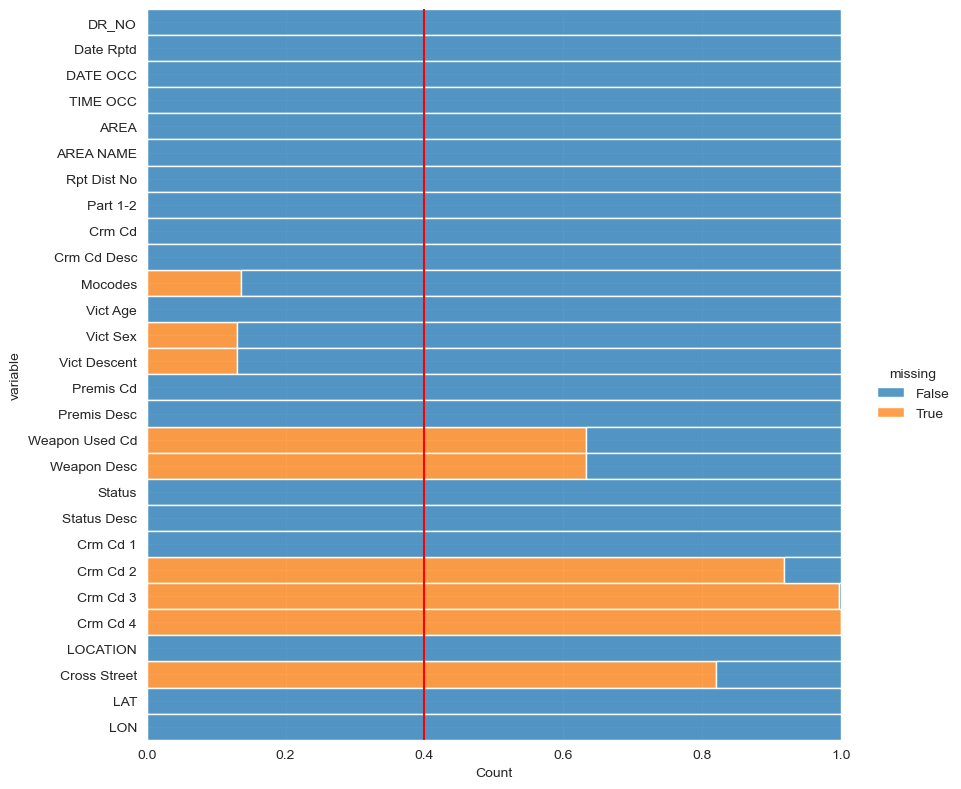

In [31]:
sns.displot(data=df.isnull().melt(value_name='missing'), y='variable', hue='missing', multiple='fill', height=8, aspect=1.1)
plt.axvline(0.4, color='r')

In [32]:
# plt.figure(figsize=(15, 10))
# plt.title('Correlation of features')
# sns.heatmap(df.corr(), annot=True, linewidths=.5)

# Handling null numeric attribute values

In [33]:
df.select_dtypes(exclude='object').isnull().sum()

DR_NO                  0
TIME OCC               0
AREA                   0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Vict Age               0
Premis Cd              5
Weapon Used Cd    201377
Crm Cd 1               3
Crm Cd 2          291873
Crm Cd 3          316974
Crm Cd 4          317824
LAT                    0
LON                    0
dtype: int64

In [34]:
median_value = df['Crm Cd 1'].median()
df['Crm Cd 1'] = df['Crm Cd 1'].fillna(median_value)

# Handling blanks of object attributes by replacing with Most Probable Values

In [35]:
df.select_dtypes(include='object').isnull().sum()

Date Rptd            0
DATE OCC             0
AREA NAME            0
Crm Cd Desc          0
Mocodes          43323
Vict Sex         41406
Vict Descent     41411
Premis Desc        108
Weapon Desc     201377
Status               0
Status Desc          0
LOCATION             0
Cross Street    260877
dtype: int64

In [36]:
cleaner = SimpleImputer(strategy='most_frequent')

value = df['Premis Desc'].values.reshape(-1, 1)
df['Premis Desc'] = cleaner.fit_transform(value)

value = df['Premis Cd'].values.reshape(-1, 1)
df['Premis Cd'] = cleaner.fit_transform(value)

In [37]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            43323
Vict Age               0
Vict Sex           41406
Vict Descent       41411
Premis Cd              0
Premis Desc            0
Weapon Used Cd    201377
Weapon Desc       201377
Status                 0
Status Desc            0
Crm Cd 1               0
Crm Cd 2          291873
Crm Cd 3          316974
Crm Cd 4          317824
LOCATION               0
Cross Street      260877
LAT                    0
LON                    0
dtype: int64

In [38]:
# Transforming date columns to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Data Visualization

<Axes: xlabel='AREA', ylabel='Count'>

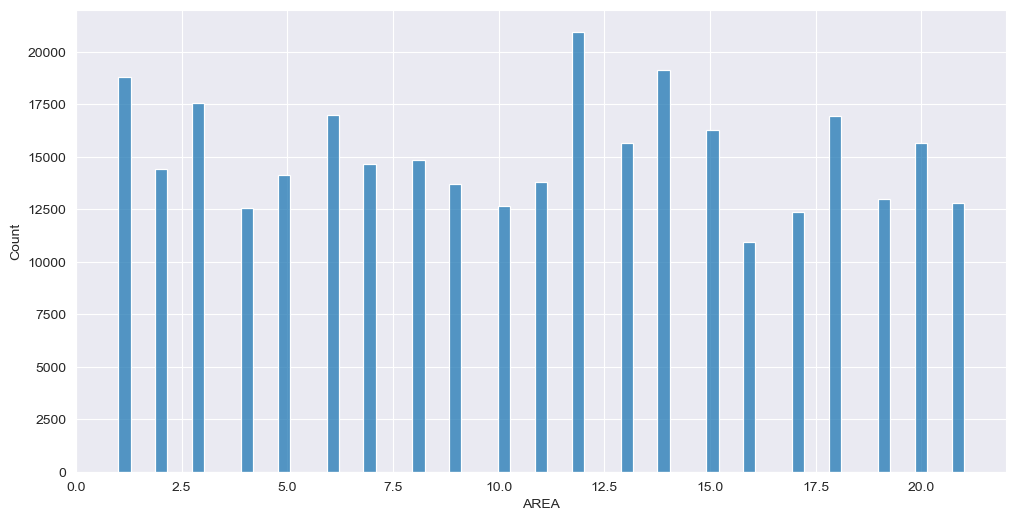

In [39]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(df['AREA'])

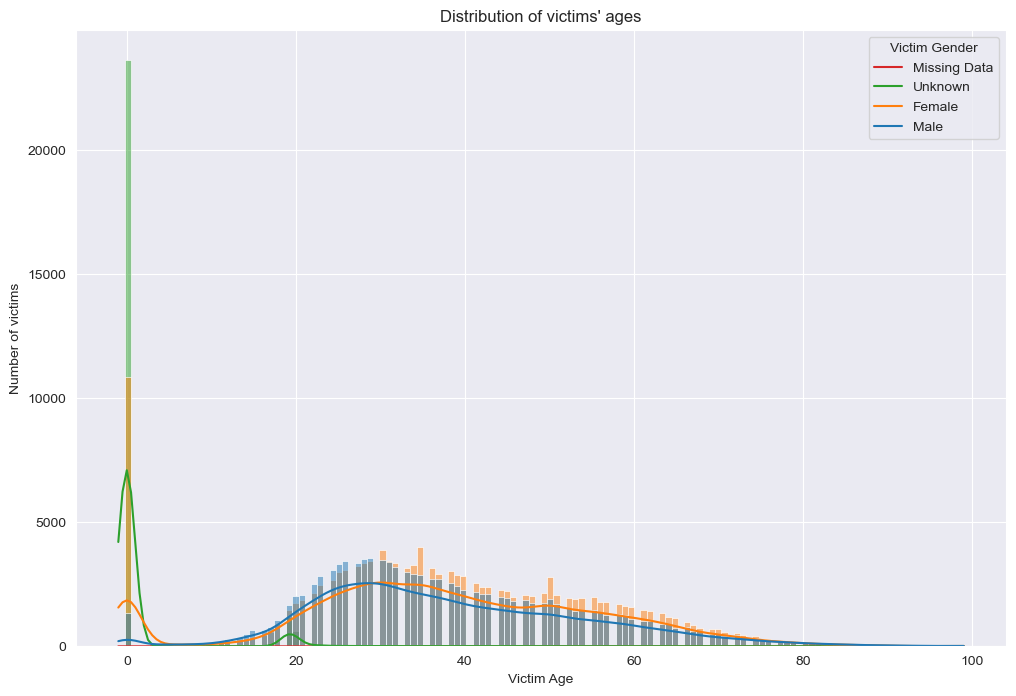

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x = 'Vict Age', hue = 'Vict Sex', kde = True)
plt.title("Distribution of victims' ages")
plt.xlabel("Victim Age")
plt.ylabel('Number of victims')
plt.legend(['Missing Data', 'Unknown', 'Female', 'Male'], title = "Victim Gender");

<Axes: xlabel='Count', ylabel='Crm Cd Desc'>

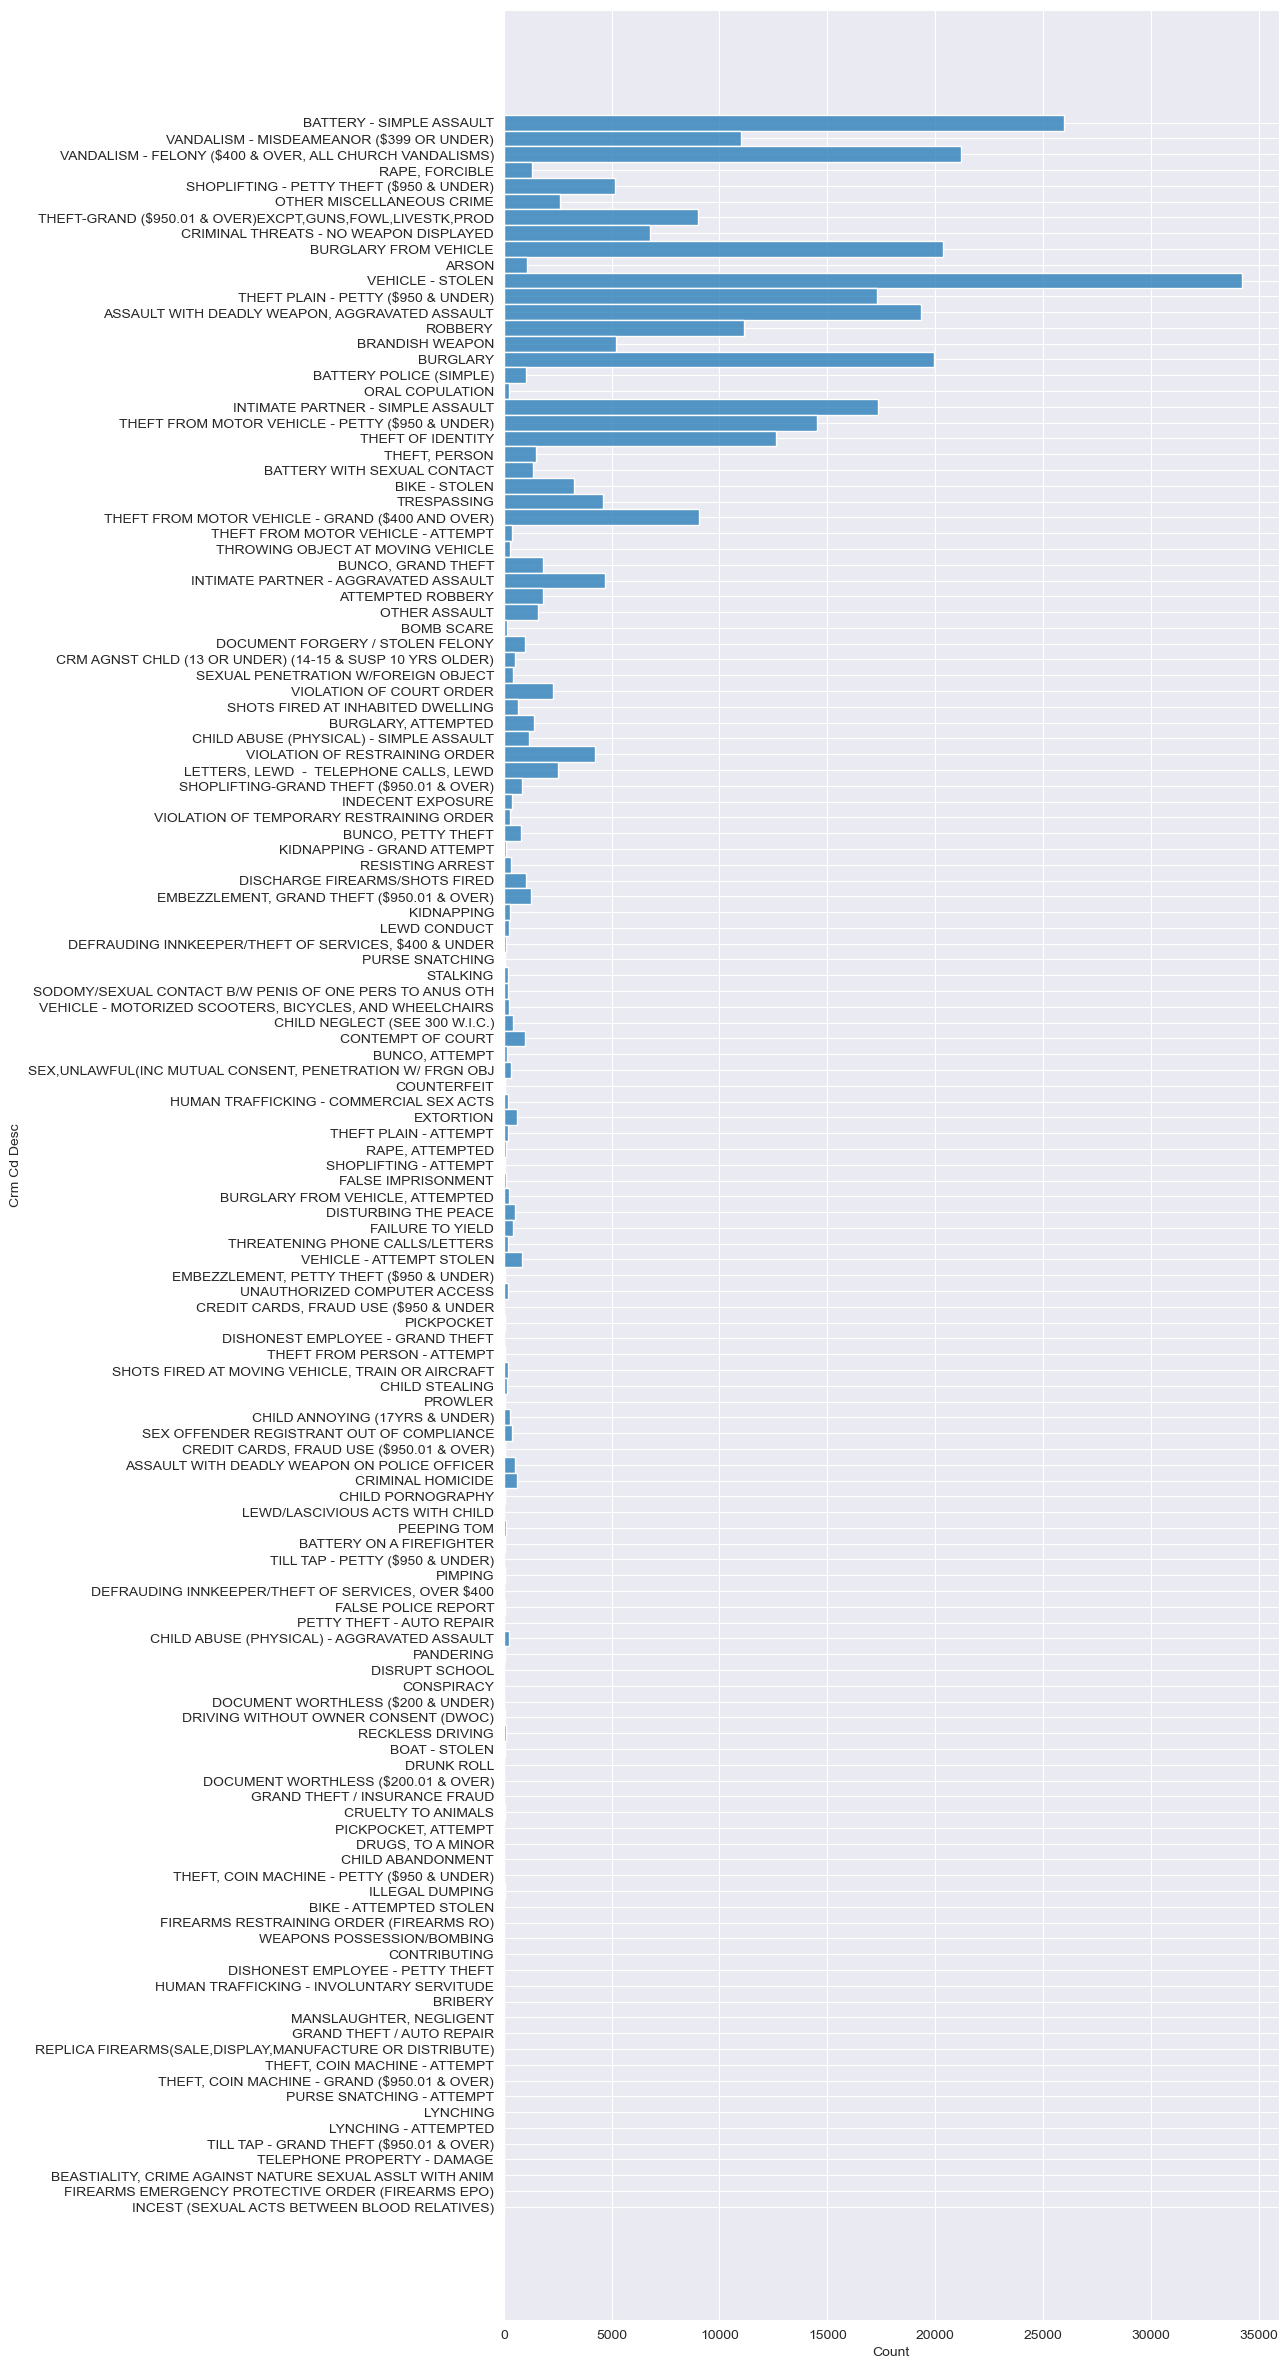

In [41]:
plt.figure(figsize=(10,30))
sns.histplot(y = df['Crm Cd Desc'])

In [42]:
# Identifying violent day of week
df['Day'] = df['DATE OCC'].dt.day_name()
labels = df['Day'].unique()
values=[]
for each in labels:
    values.append(len(df[df['Day']==each]))
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()
df.drop(columns=['Day'], axis=1, inplace=True)

<Axes: xlabel='AREA', ylabel='Vict Age'>

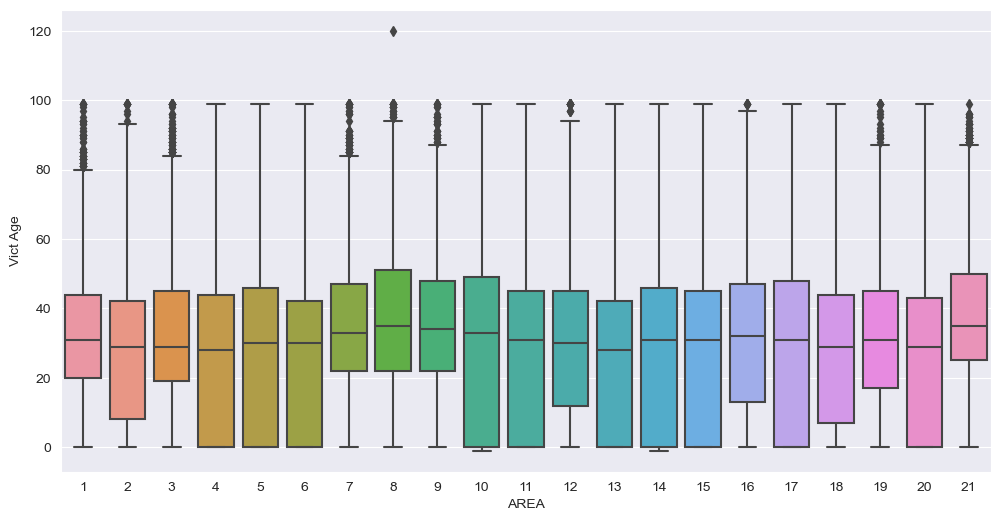

In [43]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x= df['AREA'], y=df['Vict Age'])

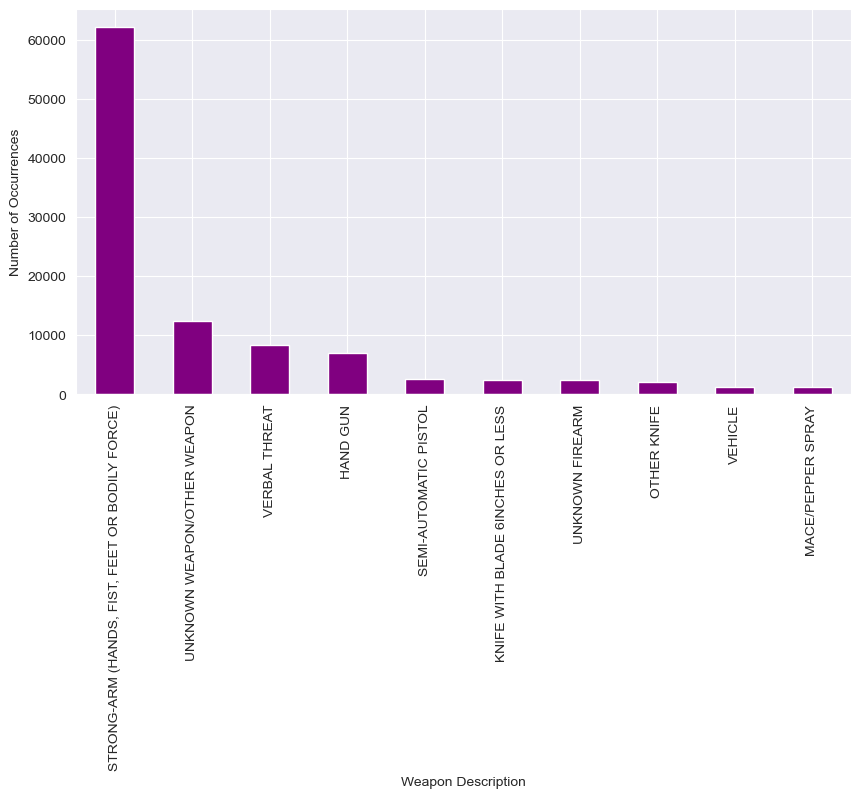

In [44]:
# Count the occurrences of each weapon type
weapon_counts = df['Weapon Desc'].value_counts()[:10]

# Visualize the distribution of weapon types
plt.figure(figsize=(10, 5))
weapon_counts.plot(kind='bar', color='purple')
plt.xlabel('Weapon Description')
plt.ylabel('Number of Occurrences')
plt.show()

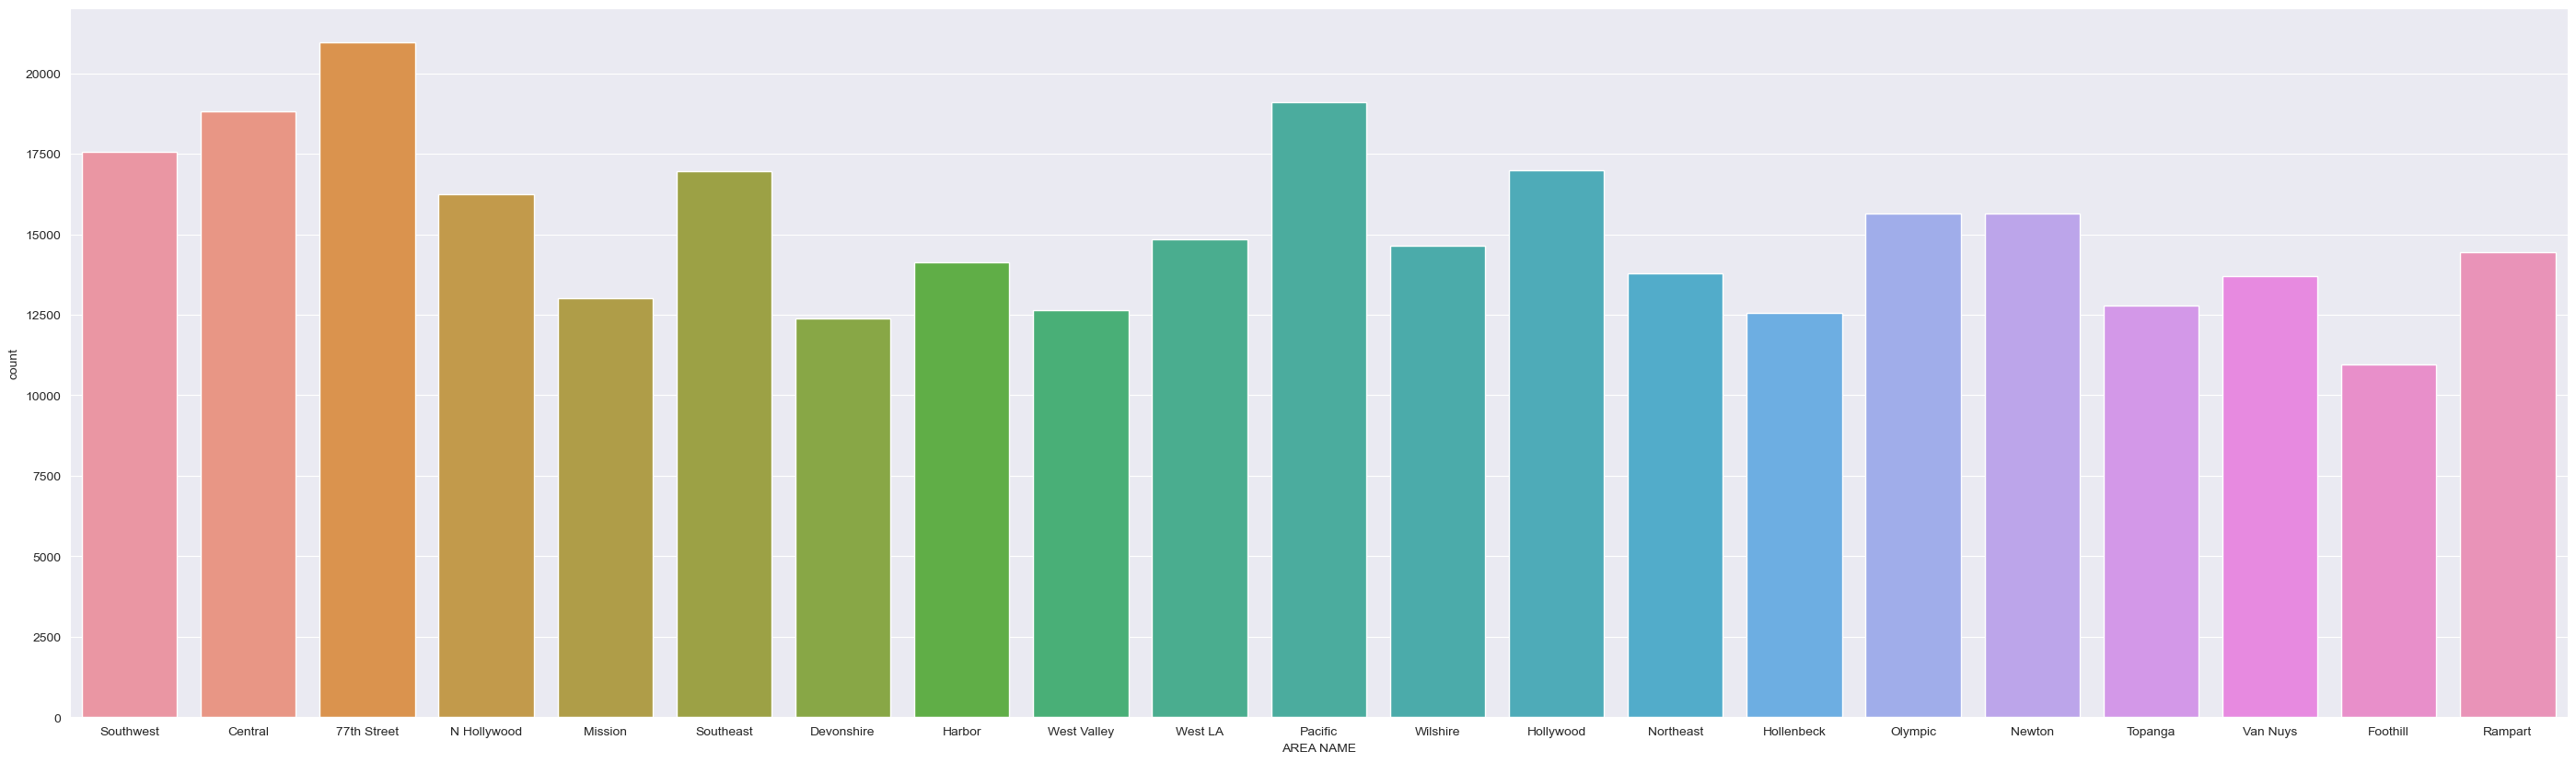

In [45]:
# Identifying which locality has more crimes
fig = plt.figure(figsize=(35,10))
ax = sns.countplot(x="AREA NAME", data=df)

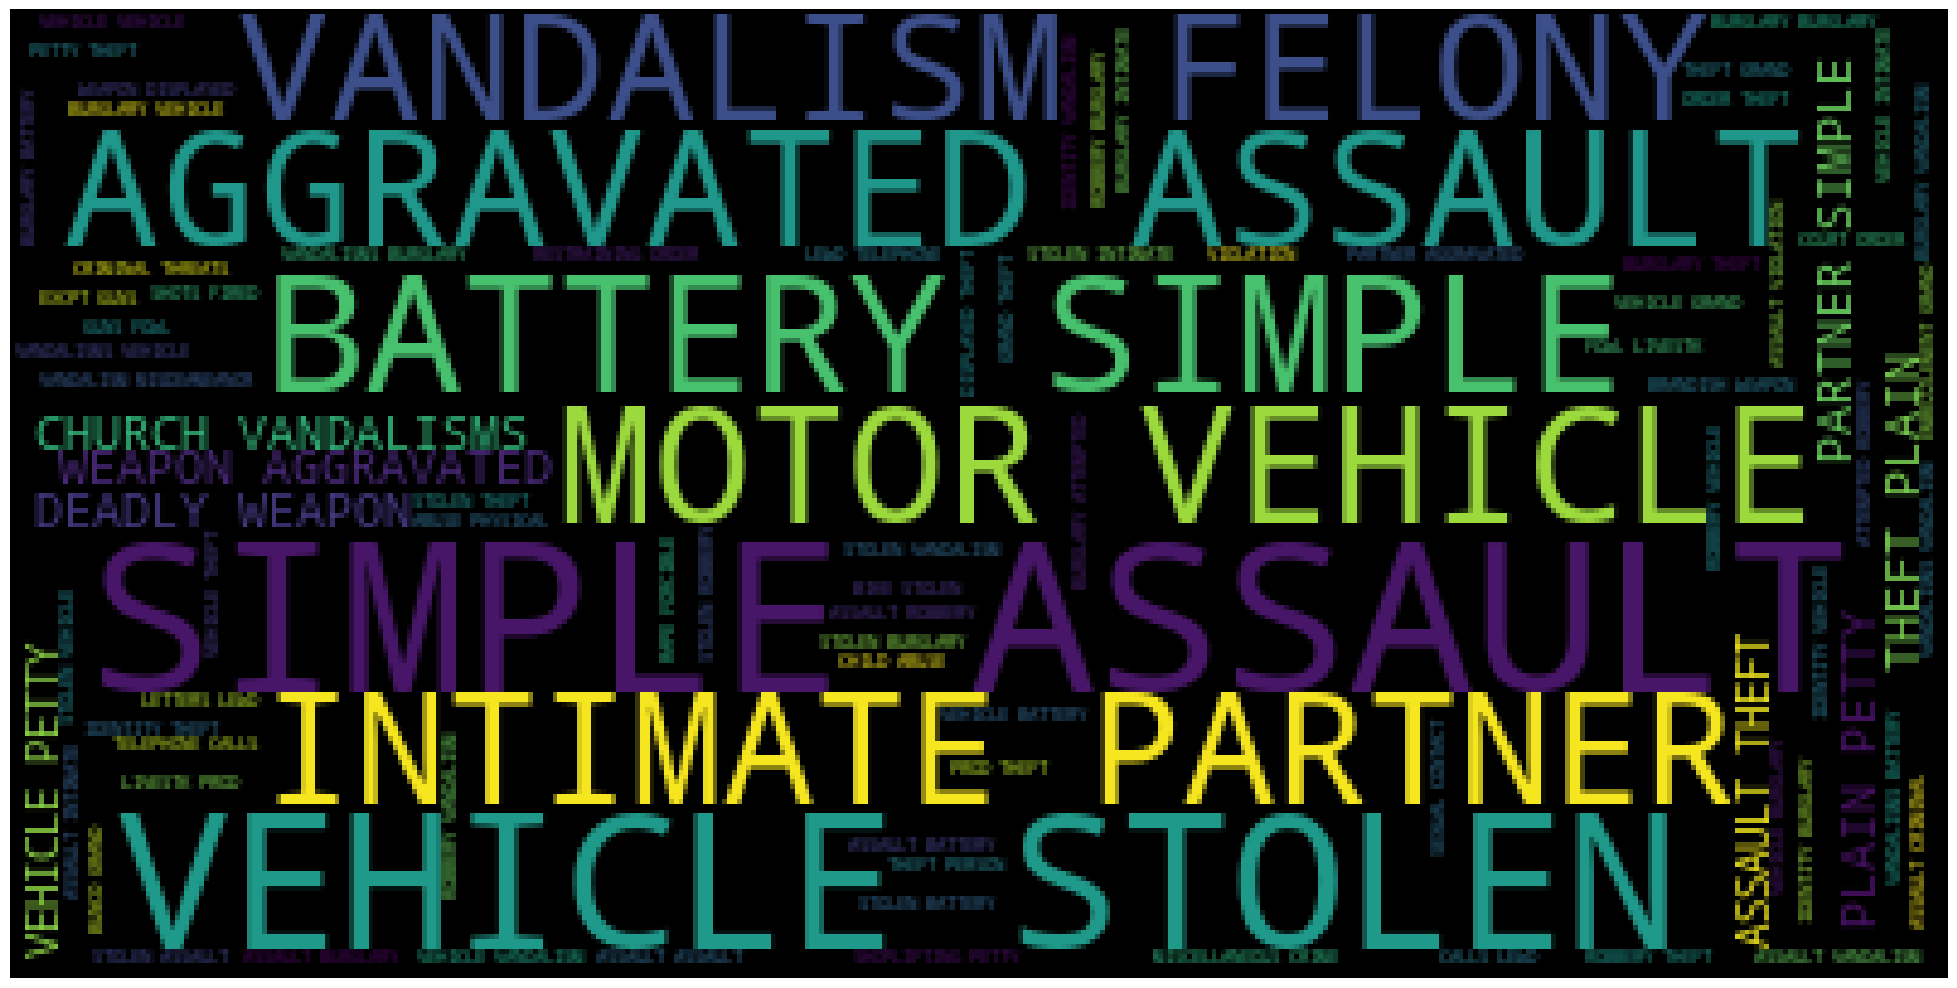

In [46]:
# World cloud indicating prevalent crimes
from wordcloud import WordCloud
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
    background_color='black'
).generate(" ".join(df['Crm Cd Desc']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

<Axes: ylabel='Status Desc'>

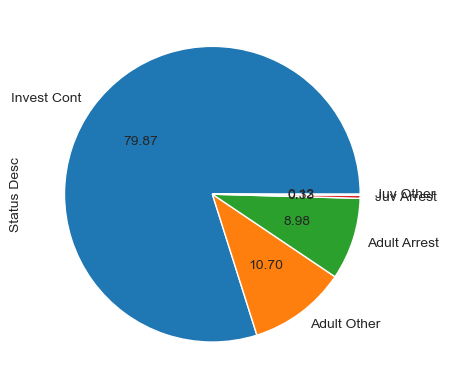

In [47]:
df['Status Desc'].value_counts().plot(kind = 'pie',autopct='%.2f')

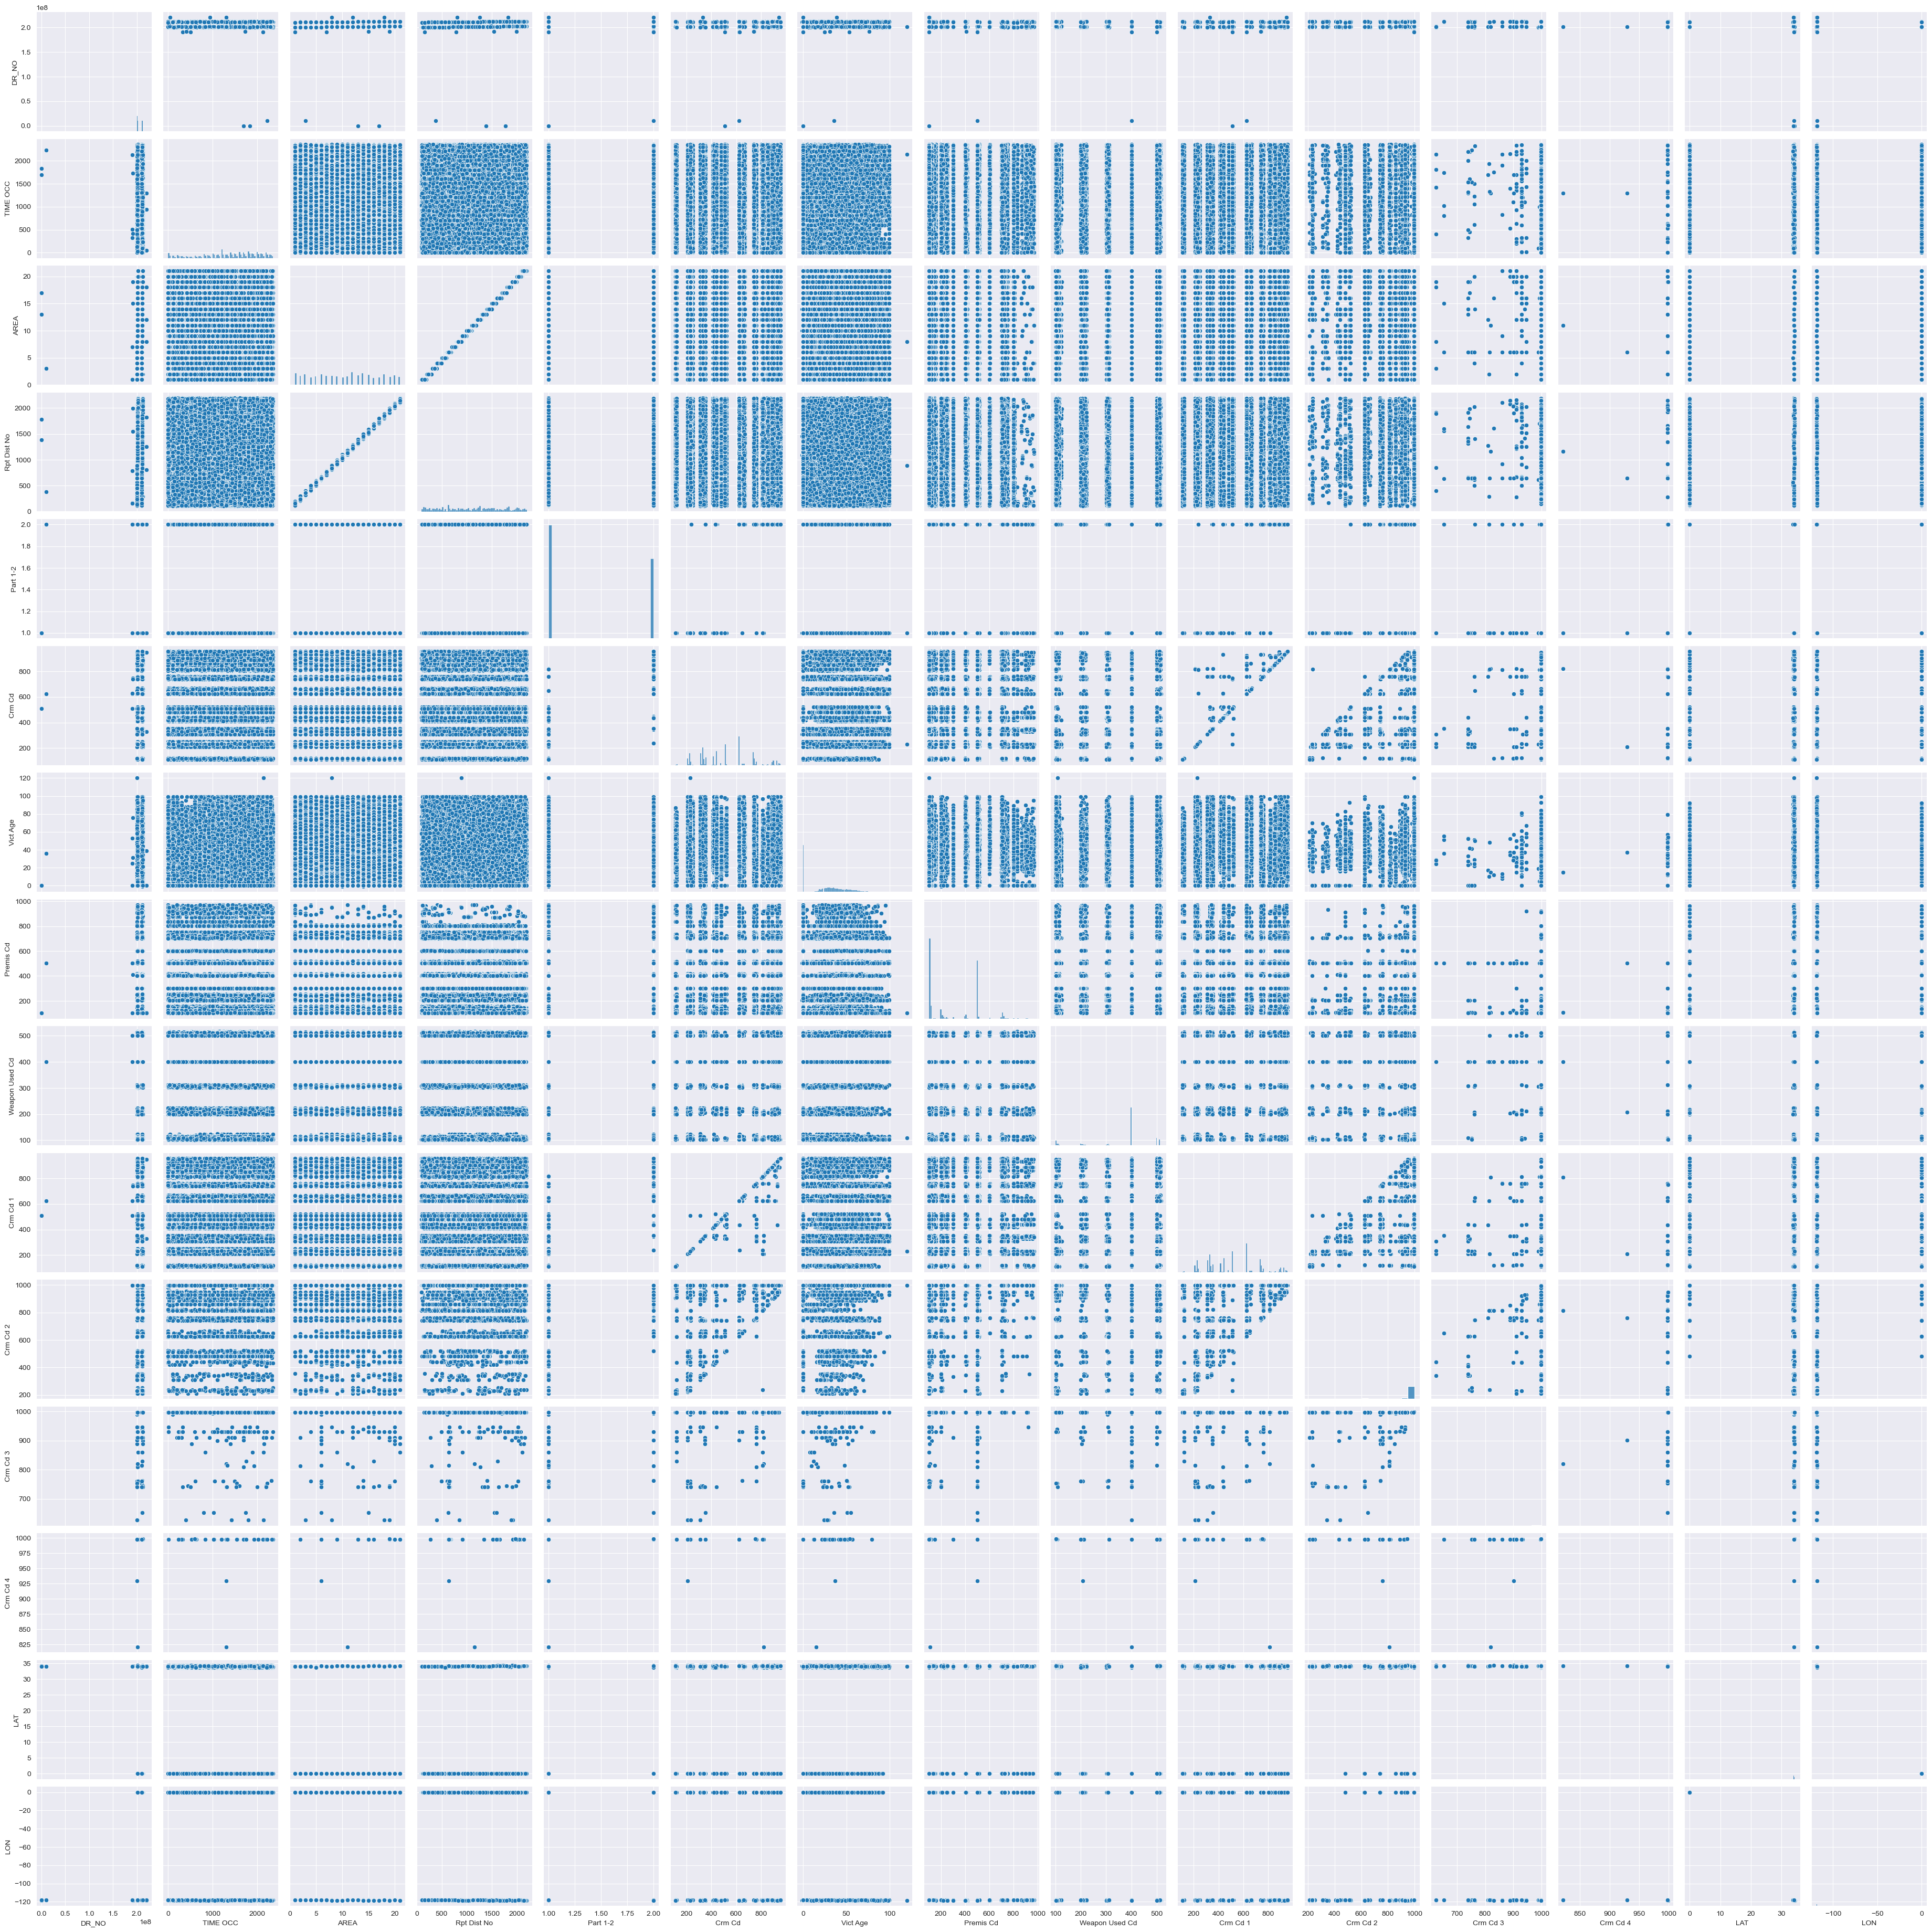

In [48]:
sns.pairplot(df)

In [49]:
#Droping empty or trivial columns
df = df.drop(
    ['Cross Street', 'Crm Cd 4', 'Crm Cd 3', 'Crm Cd 2', 'Weapon Desc', 'Weapon Used Cd', 'Vict Descent', 'Vict Sex',
     'Mocodes'], axis=1)

In [50]:
# Drop 'LOCATION' and 'DR_NO' Columns
df.drop(columns=['LOCATION'], axis=1, inplace=True)
df.drop(columns=['DR_NO'], axis=1, inplace=True)

# Drop 'Date Rpt' and 'DATE OCC' Columns
df.drop(columns=['Date Rptd', 'DATE OCC'], axis=1, inplace=True)

# Drop Status column
df.drop(columns=['Status'], axis=1, inplace=True)

In [51]:
# Encoding Categorical Variables

df.select_dtypes(include='object')
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].nunique())
df['AREA NAME'].unique()


AREA NAME 21
Crm Cd Desc 133
Premis Desc 302
Status Desc 5


array(['Southwest', 'Central', '77th Street', 'N Hollywood', 'Mission',
       'Southeast', 'Devonshire', 'Harbor', 'West Valley', 'West LA',
       'Pacific', 'Wilshire', 'Hollywood', 'Northeast', 'Hollenbeck',
       'Olympic', 'Newton', 'Topanga', 'Van Nuys', 'Foothill', 'Rampart'],
      dtype=object)

In [52]:
le = LabelEncoder()
df['AREA NAME'] = le.fit_transform(df['AREA NAME'])
df.columns

Index(['TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd',
       'Crm Cd Desc', 'Vict Age', 'Premis Cd', 'Premis Desc', 'Status Desc',
       'Crm Cd 1', 'LAT', 'LON'],
      dtype='object')

In [53]:
CrimeType = df['Crm Cd Desc'].apply(lambda x: x.split(' ')[0])
CrimeType

0           BATTERY
1           BATTERY
2         VANDALISM
3         VANDALISM
4         VANDALISM
            ...    
317849      VEHICLE
317850        FALSE
317851      BATTERY
317852       THEFT,
317853      VEHICLE
Name: Crm Cd Desc, Length: 317854, dtype: object

In [54]:
df.drop(columns=['Crm Cd Desc'], axis=1, inplace=True)
df.insert(5, 'CrimeType', CrimeType)
df['CrimeType'] = le.fit_transform(df['CrimeType'])

CrimeSituation = df['Premis Desc'].apply(lambda x: x.split(' ')[0])
df.drop(columns=['Premis Desc'], axis=1, inplace=True)
df.insert(5, 'CrimeSituation', CrimeSituation)
df['CrimeSituation'] = le.fit_transform(df['CrimeSituation'])

In [55]:
# Encode 'Status Desc' Categorical Attribute
df['Status Desc'].unique()

array(['Adult Other', 'Invest Cont', 'Adult Arrest', 'Juv Arrest',
       'Juv Other'], dtype=object)

In [56]:
ohe = OneHotEncoder(sparse=False)
df['Status Desc'] = ohe.fit_transform(df['Status Desc'].values.reshape(-1, 1))

# Split the data into training and testing sets

In [57]:
y = df.pop('Premis Cd')
y.shape

(317854,)

In [58]:
x = df
x.shape

(317854, 13)

# Correlation using mutual information

In [59]:
from sklearn.feature_selection import mutual_info_classif, f_classif

selector = SelectKBest(score_func=f_classif, k= 6)

selector.fit(x,y)
selector.transform(x)

x.columns[selector.get_support()]

Index(['Part 1-2', 'CrimeSituation', 'CrimeType', 'Crm Cd', 'Vict Age',
       'Crm Cd 1'],
      dtype='object')

In [60]:
x = df[['CrimeSituation', 'CrimeType', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Crm Cd 1']]

In [61]:
x.head()

CrimeSituation  CrimeType  Part 1-2  Crm Cd  Vict Age  Crm Cd 1
0             150          3         2     624        36     624.0
1             149          3         2     624        25     624.0
2             111         80         2     745        62     745.0
3             111         80         2     745        76     745.0
4              19         80         2     740        31     740.0

In [62]:
y = y.values.reshape(-1,1)

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3)

## K Fold Cross Validation

In [64]:
from sklearn.model_selection import StratifiedKFold
from sklearn import neighbors, tree, ensemble, naive_bayes

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models = []
accuracy = []

## Using Decision Tree Classifier

In [65]:
dec = tree.DecisionTreeClassifier(random_state= 42)
score = cross_val_score(dec, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Accuracy: {"{:.2f}".format(score.mean())}')
models.append('Decision Tree')
accuracy.append(score.mean())

Scores for each fold are: [0.95995506 0.95988764 0.96044855 0.96047102 0.96056091]
Accuracy: 0.96


## Using Random Forest Classifier

In [67]:
rf = ensemble.RandomForestClassifier(random_state= 42)
score = cross_val_score(rf, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
models.append('Random Forest')
accuracy.append(score.mean())

Scores for each fold are: [0.93826966 0.93750562 0.93860536 0.93698735 0.93730196]
Average score: 0.94


## Using KNN

In [ ]:
import numpy as np

error_rate = []
for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o')
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [70]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
score = cross_val_score(knn, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
models.append('KNN')
accuracy.append(score.mean())

Scores for each fold are: [0.91388764 0.91301124 0.912425   0.91361604 0.91202049]
Average score: 0.91


## Using Naive Bayes

In [71]:
nb = naive_bayes.GaussianNB()
score = cross_val_score(nb, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
models.append('Naive Bayes')
accuracy.append(score.mean())

Scores for each fold are: [0.95622472 0.95624719 0.95736983 0.95896537 0.95350457]
Average score: 0.96


<Axes: title={'center': 'Training accuracies of different models'}, xlabel='Models', ylabel='Accuracy'>

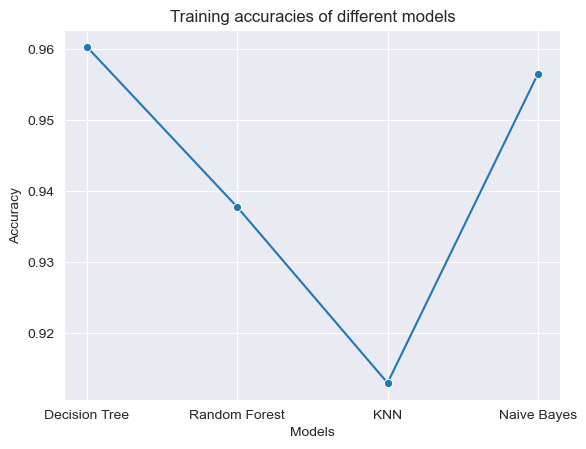

In [72]:
plt.title('Training accuracies of different models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
sns.lineplot(x=models,y=accuracy, marker = 'o')

## Testing Models

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dec.fit(x_train, y_train)
y_test_pred = dec.predict(x_test)
results= [{ "Models": "Decision Tree Classifier",
    "Accuracy": accuracy_score(y_test,y_test_pred),
      "Precision": precision_score(y_test, y_test_pred, average='weighted'),
      "Recall": recall_score(y_test, y_test_pred, average='weighted'),
      "F1 Score": f1_score(y_test, y_test_pred, average='weighted')}]

results = pd.DataFrame(results,columns=['Models','Accuracy','Precision','Recall','F1 Score'])

In [87]:
knn.fit(x_train, y_train)
y_test_pred = knn.predict(x_test)
new_row = { "Models": "K Nearest Neighbors",
            "Accuracy": accuracy_score(y_test,y_test_pred),
            "Precision": precision_score(y_test, y_test_pred, average='weighted'),
            "Recall": recall_score(y_test, y_test_pred, average='weighted'),
            "F1 Score": f1_score(y_test, y_test_pred, average='weighted')}
results = results.append(new_row,ignore_index=True)

In [83]:
nb.fit(x_train, y_train)
y_test_pred = nb.predict(x_test)
new_row = { "Models": "Naive Bayes",
            "Accuracy": accuracy_score(y_test,y_test_pred),
            "Precision": precision_score(y_test, y_test_pred, average='weighted'),
            "Recall": recall_score(y_test, y_test_pred, average='weighted'),
            "F1 Score": f1_score(y_test, y_test_pred, average='weighted')}
results = results.append(new_row,ignore_index=True)

Models  Accuracy  Precision   Recall  F1 Score
0  Decision Tree Classifier   0.95972   0.948660  0.95972  0.951124
1               Naive Bayes   0.95628   0.937027  0.95628  0.944962

In [88]:
rf.fit(x_train, y_train)
y_test_pred = rf.predict(x_test)
new_row = { "Models": "Random Forest Classifier",
            "Accuracy": accuracy_score(y_test,y_test_pred),
            "Precision": precision_score(y_test, y_test_pred, average='weighted'),
            "Recall": recall_score(y_test, y_test_pred, average='weighted'),
            "F1 Score": f1_score(y_test, y_test_pred, average='weighted')}
results = results.append(new_row,ignore_index=True)

In [89]:
display(results)

Models  Accuracy  Precision    Recall  F1 Score
0  Decision Tree Classifier  0.959720   0.948660  0.959720  0.951124
1       K Nearest Neighbors  0.917206   0.903758  0.917206  0.905907
2               Naive Bayes  0.956280   0.937027  0.956280  0.944962
3  Random Forest Classifier  0.939344   0.928275  0.939344  0.930834